1. 

$prior \sim \mathit{N}(0,kernel(x,x')) \sim \mathit{N}(0,\mathit{I})*L$   where $ LL^T = kernel(x,x')$

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [23]:
# l = 10
n = 100
nosiy_variance = 0.4
kernel = lambda x1,x2,l: np.exp(-1/(2*l) * (x1- x2.T)**2) # shape:(len(x1),len(x2))
nsamples =lambda n: np.linspace(-4, 4, n).reshape(-1,1) # generate sample data
normalDistribution = np.random.normal(size=(n,10)) # N(0,1)

Xsamples = nsamples(n) # generate samples 


<IPython.core.display.Javascript object>


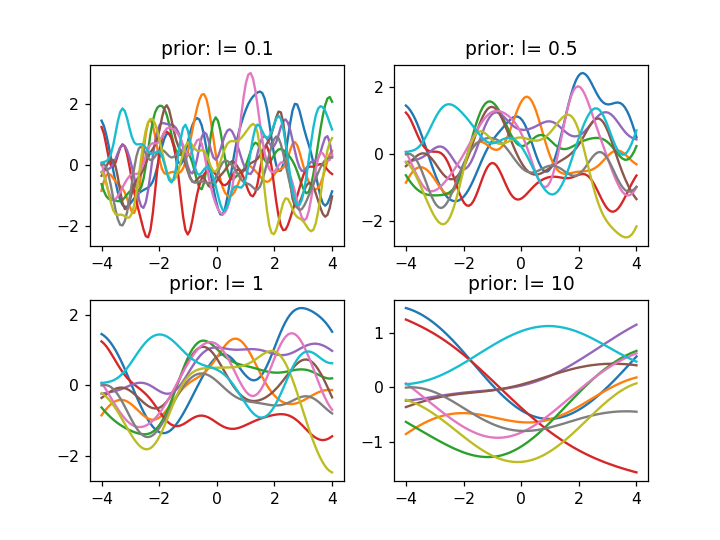

In [28]:

def GPwithl(l_list,xsample,theta=1e-7):
    count = 1
    plt.figure()
    plt.subplots_adjust(hspace=0.3)
    for i in l_list:
        kl = kernel(xsample,xsample,i)
        k_with_nosiy = kl + theta*np.eye(n)
        L = np.linalg.cholesky(k_with_nosiy)
        y_prior = np.dot(L,normalDistribution)
        plt.subplot(2,2,count)
        count += 1
        plt.plot(xsample,y_prior)
        plt.title("prior: l= "+str(i))
        
GPwithl([0.1,0.5,1,10],Xsamples)

2

## Row data

In [29]:
fun = lambda x: x*np.sin(x)

In [84]:
ntest = 50
ntrain= 20
X_test = np.random.uniform(0,2*np.pi,size=(ntest))
X_test.sort()
X_test = X_test.reshape(-1,1)
X_train = np.random.uniform(0,2*np.pi,size=(ntrain,1))
theta = 0.5
y = fun(X_train) + np.random.normal(0,theta**2)

$\mathbf{k}_y=kernel(x,x') + \varepsilon I$   
$\boldsymbol{\mu}_{*}=\mathbf{K}_{*}^{T} \mathbf{K}_{y}^{-1} \mathbf{y}$  
$\boldsymbol{\Sigma}_{*}=\mathbf{K}_{* *}-\mathbf{K}_{*}^{T} \mathbf{K}_{y}^{-1} \mathbf{K}_{*}$  

In [101]:
epsilon = 1e-7
l = 0.1
ky = kernel(X_train,X_train,l) + epsilon*np.eye(ntrain)
ky_inv = np.linalg.inv(ky)
k_train_test = kernel(X_train,X_test,l)

In [102]:
mean = np.dot(k_train_test.T,np.dot(ky_inv,y))

In [103]:
cov = kernel(X_test,X_test,l) - np.dot(k_train_test.T,np.dot(ky_inv,k_train_test))

In [104]:
sd = np.sqrt(np.diag(cov))

<IPython.core.display.Javascript object>


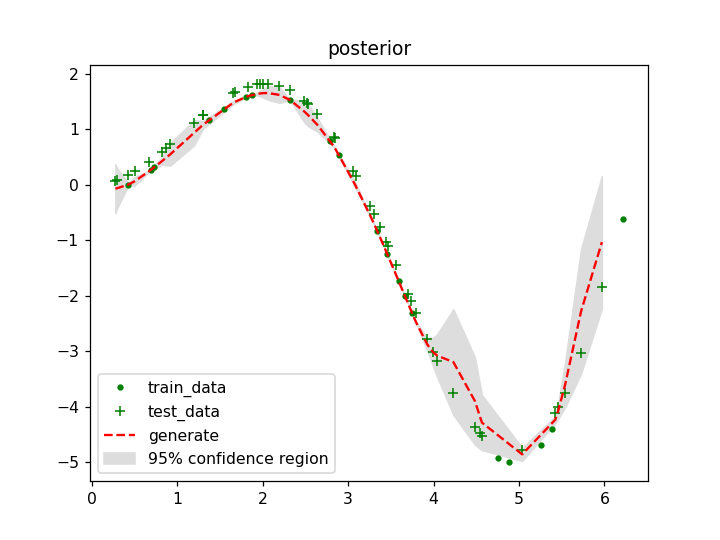

Text(0.5, 1.0, 'posterior')

In [106]:
plt.figure(1)
plt.plot(X_train, y, 'g.')
plt.plot(X_test,  fun(X_test), 'g+')
plt.plot(X_test, mean,'r--')
plt.gca().fill_between(X_test.flat, mean.flat-1.96*sd, mean.flat+1.96*sd, color="#dddddd")
plt.legend(['train_data','test_data','generate','95% confidence region'])
# plt.legend(['train_data','test_data','generate'])
plt.title("posterior")